In [5]:
#part one: compute the jaccard similarity
#https://github.com/VipanchiKatthula/Jaccard_Cosine_Similarity/blob/master/Jaccard_and_Cosine_Similarity.ipynb
%pip install nltk

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

In [37]:
%pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 KB 3.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 2.4.0
    Uninstalling sentence-transformers-2.4.0:
      Successfully uninstalled sentence-transformers-2.4.0
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [3]:
#load the file
df_hsien = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_hsien.csv')
df_google = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_google.csv')
df_yiyun = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_yiyun.csv')
df_google = df_google.drop('Unnamed: 0', axis=1)
df_hsien.columns = ['English_Verse']
df_yiyun.columns = ['English_Verse']
df_google.columns = ['English_Verse']
print(df_hsien,df_google,df_yiyun)

                                        English_Verse
0   There are said to be some victors who take no ...
1   Look at Ah Q, light and elated, as if about to...
2   This victory was not without strange consequen...
3                        "Ah Q, may you die sonless!"
4   These words sounded again in Ah Q's cars, and ...
5   "…The monk paws... Woman, woman! … Woman!" he ...
6   We shall never know when Ah Q finally fell asl...
7   From this we can see that woman is a menace to...
8   The majority of Chinese men could become saint...
9   Ah Q, too, was a man of strict morals to begin...
10  Who could tell that close on thirty, when a ma...
11                          "Woman ..." thought Ah Q.
12  He kept a close watch on those women who he be...
13  One day when Ah Q was grinding rice in Mr. Cha...
14  When Amah Wu, the only maidservant in the Chao...
15  "Our mistress hasn't eaten anything for two da...
16  "Woman... Amah Wu... this little widow," thoug...
17  "Our young mistress is g

In [4]:
from sklearn.metrics.pairwise import cosine_similarity


In [5]:
embedding_hsien = model.encode(df_hsien['English_Verse'].tolist(), convert_to_tensor=True)
embedding_yiyun = model.encode(df_yiyun['English_Verse'].tolist(), convert_to_tensor=True)
embedding_google = model.encode(df_google['English_Verse'].tolist(), convert_to_tensor=True)

In [6]:
similarity = []
for emb1, emb2 in zip(embedding_hsien, embedding_google):
    sim = cosine_similarity([emb1.cpu().numpy()], [emb2.cpu().numpy()])
    similarity.append(sim[0][0])  # sim is a 2D array, extract the single value

df_google['similarities'] = similarity
print(df_google['similarities'])

0     0.747759
1     0.547950
2     0.693194
3     0.630115
4     0.652093
5     0.709445
6     0.363449
7     0.125580
8     0.275009
9     0.366055
10    0.506409
11    0.341411
12    0.267233
13    0.310761
14    0.556252
15    0.284639
16    0.289029
17    0.304159
18    0.299109
19    0.212317
20    0.100469
21    0.314354
22    0.251280
23    0.323763
24    0.377994
25    0.173434
26    0.189718
27    0.305243
28    0.399616
29    0.575080
30    0.421430
31    0.247936
32    0.384014
33    0.241067
34    0.342778
35    0.607510
36    0.237076
37    0.257679
38    0.756672
39    0.619574
40    0.750252
41    0.513646
42    0.578352
43    0.371969
44    0.878099
Name: similarities, dtype: float32


In [12]:
#comparison of whole chapter
chapt4_hsien = " ".join(df_hsien['English_Verse'])
chapt4_google = " ".join(df_google['English_Verse'])
chapt4_yiyun = " ".join(df_yiyun['English_Verse'])
print(chapt4_hsien)

There are said to be some victors who take no pleasure in a victory unless their opponents arc as fierce as tigers or eagles: if their adversaries are as timid as sheep or chickens they find their triumph empty. There are other victors who, having carried all before them, with the enemy slain or surrendered, cowering in utter subjection, realize that now no toc, rival, or friend is left - they have only them-selves, supreme, solitary, desolate, and forlorn. Then they find their triumph a tragedy. But our hero was not so spine-less. He was always exultant. This may be a proof of the moral supremacy of China over the rest of the world. Look at Ah Q, light and elated, as if about to fly! This victory was not without strange consequences, though. For quite a time he seemed to be flying, and he flew into the Tutelary God's Temple, where he would normally have snored as soon as he lay down. This evening, however, he found it very difficult to close his eyes, for he felt as if there were some

In [9]:
embedding_whole_hsien = model.encode(chapt4_hsien, convert_to_tensor=True)
embedding_whole_google = model.encode(chapt4_google, convert_to_tensor=True)
embedding_whole_yiyun = model.encode(chapt4_yiyun, convert_to_tensor=True)

In [10]:
similarity_whole_hsigoo = cosine_similarity([embedding_whole_hsien.cpu().numpy()], [embedding_whole_google.cpu().numpy()])
similarity_whole_gooyi = cosine_similarity([embedding_whole_google.cpu().numpy()], [embedding_whole_yiyun.cpu().numpy()])
similarity_whole_hsiyi = cosine_similarity([embedding_whole_hsien.cpu().numpy()], [embedding_whole_yiyun.cpu().numpy()])
print(similarity_whole_hsigoo, similarity_whole_gooyi, similarity_whole_hsiyi)

[[0.7861637]] [[0.75270593]] [[0.8798642]]


In [15]:
#split to string to set
set_hsien_chapt4 = set(chapt4_hsien.split())
set_google_chapt4 = set(chapt4_google.split())
set_yiyun_chapt4 = set(chapt4_yiyun.split())


In [20]:
#compute jaccard similarity

#jaccard score between hsien and google
inter_hsigoo_chapt4 = set_hsien_chapt4.intersection(set_google_chapt4)
union_hsigoo_chapt4 = set_hsien_chapt4.union(set_google_chapt4)
jaccard_hsigoo_chapt4 = len(inter_hsigoo_chapt4)/len(union_hsigoo_chapt4)
print(jaccard_hsigoo_chapt4)

#jaccard score between google and yiyun
inter_gooyi_chapt4 = set_google_chapt4.intersection(set_yiyun_chapt4)
union_gooyi_chapt4 = set_google_chapt4.union(set_yiyun_chapt4)
jaccard_gooyi_chapt4 = len(inter_gooyi_chapt4)/len(union_gooyi_chapt4)
print(jaccard_gooyi_chapt4)

#jaccard score between yiyun and hsien
inter_hsiyi_chapt4 = set_hsien_chapt4.intersection(set_yiyun_chapt4)
union_hsiyi_chapt4 = set_hsien_chapt4.union(set_yiyun_chapt4)
jaccard_hsiyi_chapt4 = len(inter_hsiyi_chapt4)/len(union_hsiyi_chapt4)
print(jaccard_hsiyi_chapt4)

0.19126506024096385
0.15555555555555556
0.21108179419525067


In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')
nltk.download('stopwords')





[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
%pip install scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
#Keybert - extract keyword
%pip install keybert

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
from keybert import KeyBERT
km_model = KeyBERT()

In [12]:
#extract keyword from chapter 4
df_hsien_texts = df_hsien['English_Verse'].tolist()
df_yiyun_texts = df_yiyun['English_Verse'].tolist()
df_google_texts = df_google['English_Verse'].tolist()
keywords = []
for text in df_hsien_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords.append(extracted_keywords)
print(keywords)


[[('victory', 0.3793), ('victors', 0.3656), ('surrendered', 0.351), ('triumph', 0.3256), ('rival', 0.3121)], [('fly', 0.4497), ('light', 0.4108), ('elated', 0.2952), ('look', 0.2642), ('ah', 0.1349)], [('nun', 0.4271), ('snored', 0.4183), ('flew', 0.3269), ('finger', 0.2598), ('victory', 0.256)], [('sonless', 0.5798), ('die', 0.2846), ('ah', 0.0955)], [('sonless', 0.2803), ('teachings', 0.2527), ('wife', 0.2264), ('ought', 0.211), ('descendants', 0.206)], [('monk', 0.3812), ('woman', 0.3592), ('paws', 0.3521), ('thought', 0.1073)], [('fingers', 0.2895), ('asleep', 0.2687), ('soft', 0.2443), ('thinking', 0.1925), ('evening', 0.1869)], [('woman', 0.5084), ('menace', 0.4291), ('mankind', 0.3863)], [('shang', 0.4679), ('chinese', 0.3642), ('chan', 0.341), ('cho', 0.3034), ('chin', 0.2992)], [('nuns', 0.4837), ('monks', 0.4243), ('heretics', 0.4008), ('nun', 0.3944), ('morals', 0.3576)], [('nun', 0.5241), ('odiousness', 0.3115), ('headedness', 0.2718), ('woman', 0.2481), ('hateful', 0.2231)

In [13]:
keywords_google = []
for text in df_google_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords_google.append(extracted_keywords)
print(keywords_google)


[[('victory', 0.4794), ('proud', 0.4192), ('winners', 0.3988), ('crowned', 0.395), ('overcome', 0.3263)], [('flying', 0.5399), ('seeing', 0.3646)], [('finger', 0.4655), ('fingers', 0.454), ('thumb', 0.4208), ('slippery', 0.3892), ('snore', 0.3022)], [('grandson', 0.4907), ('broken', 0.3516), ('son', 0.3399)], [('piety', 0.265), ('thoughts', 0.2628), ('sentence', 0.2609), ('filial', 0.2461), ('ghost', 0.2451)], [('women', 0.4972), ('thought', 0.2537)], [('monk', 0.4618), ('woman', 0.302), ('women', 0.2894), ('moves', 0.2582), ('thought', 0.1071)], [('snoring', 0.4943), ('female', 0.2953), ('slippery', 0.2796), ('fingers', 0.2515), ('fluttered', 0.2459)], [('harmful', 0.4741), ('women', 0.3903), ('know', 0.2221)], [('zhou', 0.4953), ('shang', 0.4864), ('zhuo', 0.451), ('qin', 0.4264), ('chinese', 0.3541)], [('fanny', 0.3132), ('doctrine', 0.2472), ('monk', 0.2443), ('righteousness', 0.2433), ('nun', 0.2407)], [('nun', 0.503), ('nuns', 0.4482), ('heresy', 0.3106), ('fluttering', 0.3061), 

In [13]:
keywords_yiyun = []
for text in df_yiyun_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords_yiyun.append(extracted_keywords)
print(keywords_yiyun)


[[('victory', 0.4304), ('overcoming', 0.3769), ('conquest', 0.3725), ('superiority', 0.3711), ('slain', 0.3658)], [('snoring', 0.4942), ('nun', 0.4415), ('forefinger', 0.3588), ('thumb', 0.297), ('lain', 0.2796)], [('descendants', 0.4364), ('scripture', 0.4183), ('ancient', 0.3109), ('grave', 0.2777), ('dying', 0.2596)], [('woman', 0.4018), ('thought', 0.204)], [('goose', 0.5018), ('sauce', 0.3668), ('woman', 0.2876), ('thought', 0.1582)], [('snoring', 0.5754), ('asleep', 0.275), ('evening', 0.1403), ('fingertips', 0.1308), ('fell', 0.11)], [('women', 0.4279), ('evil', 0.4067), ('proof', 0.3494), ('irrefutable', 0.3482), ('root', 0.2002)], [('shang', 0.4352), ('zhou', 0.4243), ('zhuo', 0.363), ('qin', 0.3449), ('concubine', 0.3319)], [('nuns', 0.3534), ('heretics', 0.338), ('monks', 0.3303), ('nun', 0.3022), ('ordained', 0.2503)], [('confucius', 0.4579), ('nun', 0.452), ('confucian', 0.3608), ('veiled', 0.3391), ('bewitchingly', 0.3144)], [('woman', 0.5064), ('thinking', 0.38), ('ah', 

In [9]:
df_yiyun_chap5 = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_yiyun.csv')
df_yiyun_chap5.rename(columns={'English_Verse_chap5_yiyun': 'English_Verse'}, inplace=True)
df_yiyun_all = pd.concat([df_yiyun, df_yiyun_chap5], ignore_index=True)
df_yiyun_all

,English_Verse
0,"There are, it is said, some victors who deligh..."
1,See him now: walking on air after a busy day o...
2,‘May you die without descendants!’ echoed in t...
3,‘Woman...’ he thought. ‘Must... find... woman...
4,"‘Sauce for the goose...’ he thought some more,..."
...,...
63,"‘What’s that under there, then?’ The old nun i..."
64,"‘Reckon they’re yours, do you? Do they answer ..."
65,"Ah-Q broke into a run, pursued by a sizeable b..."
66,"Afraid the dog might be set loose on him, Ah-Q..."


In [26]:
%pip install gensim


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 KB 4.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import gensim
from gensim.utils import simple_preprocess

In [32]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from gensim.utils import simple_preprocess

nltk.download('stopwords')

stop_words = stopwords.words('english')
newStopWords = ['ah', 'q', 'i']
stop_words.extend(newStopWords)

def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet), deacc=True) if word not in stop_words] for tweet in tweets]

def preprocessing(df):
    df['English_Verse'] = df['English_Verse'].str.lower()  # Convert to lowercase
    df['English_Verse'] = df['English_Verse'].str.replace("[^a-zA-Z#]", " ")  # Remove punctuations
    df['English_Verse'] = df['English_Verse'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))  # Remove short words
    df['Tweet tokens'] = df['English_Verse'].apply(lambda x: remove_stopwords([x])[0])
    df['tokens_no_stop_joined'] = df['Tweet tokens'].apply(lambda x: ' '.join(x))
    return df

def retrieve_text(df):
    doc = '. '.join(df['tokens_no_stop_joined'])
    return doc

def ngrams_series_func(data, n):
    wordList = re.sub("[^\w]", " ", data).split()
    ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:10]
    return ngrams_series

     

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df_ngrams_yiyun = pd.DataFrame(df_yiyun_all)
df_ngrams_yiyun = preprocessing(df_ngrams_yiyun)
df_ngrams_yiyun


,English_Verse,Tweet tokens,tokens_no_stop_joined
0,"there are, said, some victors delight only vic...","[said, victors, delight, victory, worthy, adve...",said victors delight victory worthy adversarie...
1,now: walking after busy moral victory! this la...,"[walking, busy, moral, victory, latest, victor...",walking busy moral victory latest victory howe...
2,‘may without descendants!’ echoed cathedral ah...,"[may, without, descendants, echoed, cathedral,...",may without descendants echoed cathedral mind ...
3,‘woman...’ thought. ‘must... find... woman...,"[woman, thought, must, find, woman]",woman thought must find woman
4,"‘sauce goose...’ thought some more, ‘... must....","[sauce, goose, thought, must, find, woman]",sauce goose thought must find woman
...,...,...,...
63,"‘what’s that under there, then?’ indicated pro...","[indicated, protuberance, beneath, jacket]",indicated protuberance beneath jacket
64,"‘reckon they’re yours, you? they answer call t...","[reckon, answer, call]",reckon answer call
65,"ah-q broke into run, pursued sizeable black us...","[broke, run, pursued, sizeable, black, usually...",broke run pursued sizeable black usually stati...
66,"afraid might loose him, ah-q gathered trophies...","[afraid, might, loose, gathered, trophies, pic...",afraid might loose gathered trophies picking s...


In [27]:
text = retrieve_text(df_ngrams_yiyun)
print(text)

said victors delight victory worthy adversaries conquest weak stupid dust ashes mouths others overcoming everything everyone path field strewn corpses slain obeisances surrendered enemy left fight friend celebrate feel desolate solitude victory weakness inexhaustible delight susceptible living proof perhaps global superiority chinese civilization. walking busy moral victory latest victory however bring unusual twist tail eventually floated temple earth grain according well established custom immediately lain begun snoring inexplicably however particular evening difficulty keeping eyes closed something curious thumb forefinger felt softer silkier usual something nun face attached fingers face rubbed smooth. may without descendants echoed cathedral mind quite right thought ought woman without descendants offer bowl rice grave woman need words ancient sages three ways betraying parents dying without descendants serious without descendants become hungry ghosts thinking point therefore full

In [28]:
import re
import matplotlib.pyplot as plt


Text(0, 0.5, '')

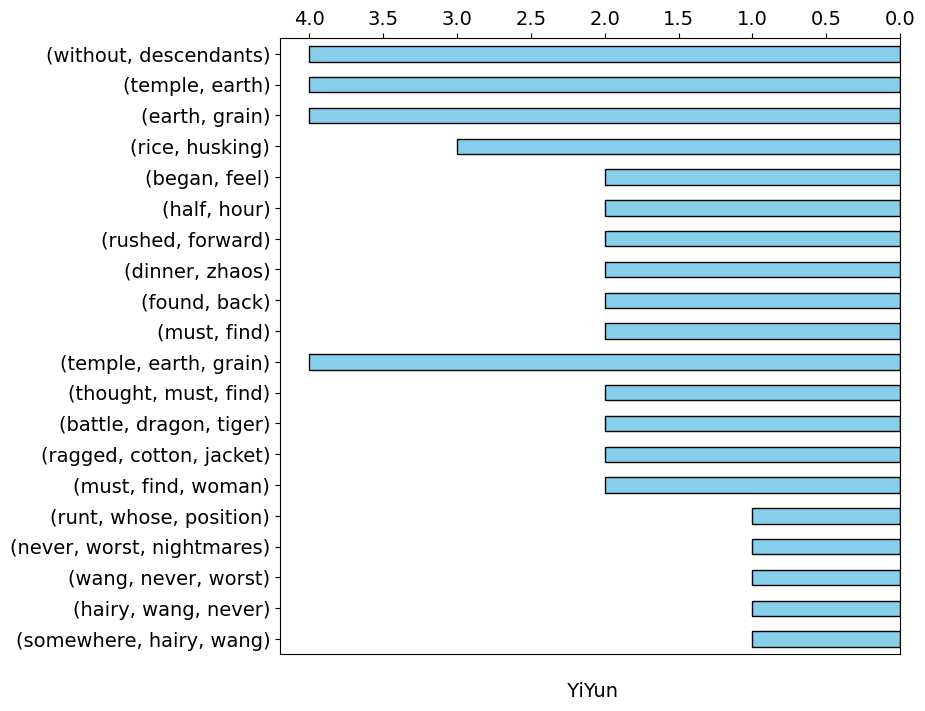

In [31]:
bigram1 = ngrams_series_func(text, 2)
trigram1 = ngrams_series_func(text, 3)



ngram1 = pd.concat([bigram1, trigram1])
barstyle = {'width': 0.5, 'edgecolor': 'black'}

plt.rcParams.update({'font.size': 14})
#fig, ax=plt.subplots(1,2, figsize=(16,8), gridspec_kw = {'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})
fig, ax=plt.subplots(1,1, figsize=(8,8))

#barh_ax = ax[0]
barh_ax = ax

ngram1[::-1].plot.barh(ax=barh_ax, color= 'skyblue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n YiYun')
barh_ax.set_ylabel('',fontsize=50)